In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# list of models
# Commented few models because they produced very big results which interfere visualization
models = [#'RandomForestRegressor',
          #'AdaBoostRegressor',
          #'BaggingRegressor',
          #'DecisionTreeRegressor',
          'DummyRegressor',
          'ExtraTreeRegressor',
          #'ExtraTreesRegressor',
          #'GaussianProcessRegressor',
          #'GradientBoostingRegressor',
          #'HuberRegressor',
          'KNeighborsRegressor',
          #'MLPRegressor',
          #'PassiveAggressiveRegressor',
          #'RANSACRegressor',
          #'SGDRegressor',
          #'TheilSenRegressor'
         ]
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']

In [80]:
# Generate different line styles
# 24 different different lines will be generated
lineStyles = ['-', '--', '-.', ':']
lineColors = ['b', 'g', 'r', 'c', 'm', 'y']
styles = []

for j in range(3):
    for i in range(5):
        styles.append(lineColors[i] + lineStyles[(i + j) % 4])

In [135]:
def visualize(arg):
    for buildingtype in buildingtypes:
        # Draw lines on single plot
        
        plt.style.use('seaborn-whitegrid')
        plt.figure(figsize=(15,3))
    
    
        for i in range(len(models)):
            dataframes = []
            data = pd.read_csv('../results/' + models[i] + '_metrics_' + buildingtype + '.csv')
            data = data.drop(columns=['Unnamed: 0'])
            data['buidingtype'] = buildingtype
            dataframes.append(data)
            result = pd.concat(dataframes)
            
            rows =  result[result['buidingtype']==buildingtype]['MAPE']
            # Single line creator
            value, = plt.plot(rows, styles[i], label=models[i])

        # Draw plot
        plt.title(buildingtype, loc='left')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.ylabel(arg)
        plt.xlabel('Buildings')
        plt.show()


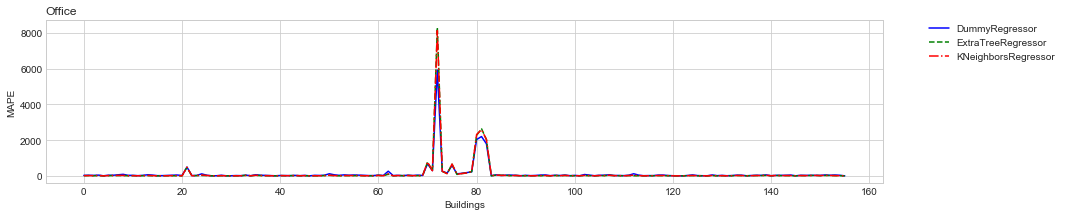

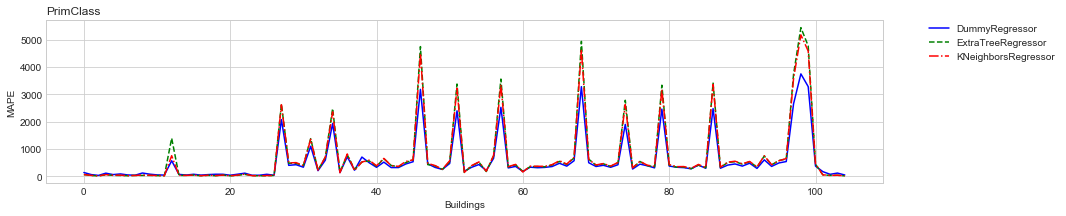

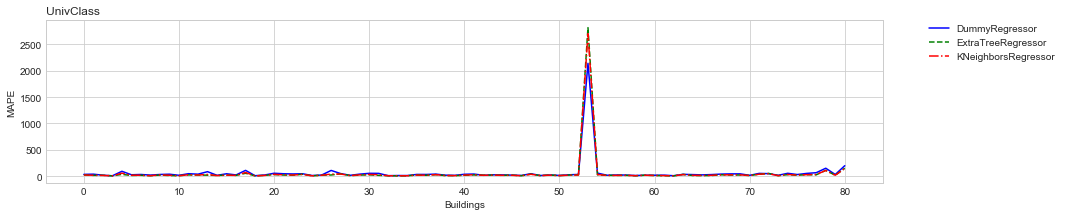

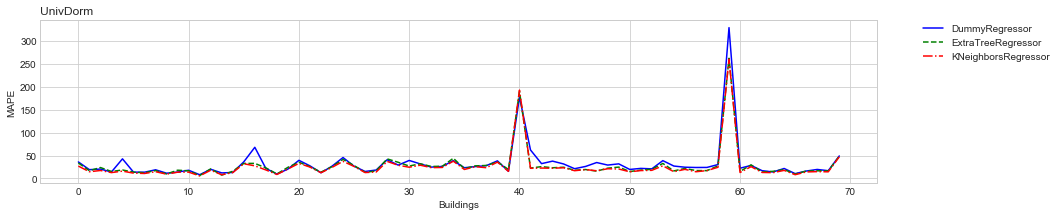

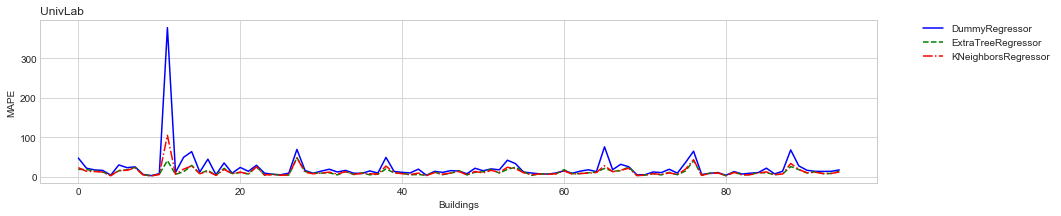

In [136]:
visualize('MAPE')